<a href="https://colab.research.google.com/github/EtheSonX082531/PYTHON-CODES-AND-PROJECTS/blob/main/Langgraph_Lock_Checking_Sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [138]:
class AgentState(TypedDict):
  correct_password:str
  user_password:str
  attempts:int
  status:str
  message:str


In [139]:
def setup_node(state:AgentState)->AgentState:
  state['correct_password']="Admin123"
  state['attempts']=1
  state['user_password']=input("Enter Password:")
  state['status']="Locked"
  state['message']=""
  return state


In [140]:
def check_node(state:AgentState)->AgentState:
  return state

In [141]:
def router_check_node(state:AgentState)->str:
  if(state['user_password']==state['correct_password']):
    return "success_node_edge"
  elif(state['attempts']<3 and (state['user_password']!=state['correct_password'])):
      return "retry_node_edge"
  else:
      return "lock_node_edge"


In [142]:
def retry_node(state:AgentState)->AgentState:
  state['user_password']=input("Please Try Again:")
  state['attempts']+=1
  return state

In [143]:
def lock_node(state:AgentState)->AgentState:
  state['status']="Locked"
  state['message']=f"Sry you have tried {state['attempts']} times with wrong Password! Your ID status: {state['status']}"
  return state

In [144]:
def success_node(state:AgentState)->AgentState:
  state['status']="Unlocked"
  state['message']=f"Congratulation! Your ID status: {state['status']}"
  return state


In [145]:
def final_node(state:AgentState)->AgentState:
  print(state['message'])
  print("Execution Finished........")
  return state

In [146]:
graph=StateGraph(AgentState)
graph.add_node("setup_node",setup_node)
graph.add_node("check_node",check_node)
graph.add_node("retry_node",retry_node)
graph.add_node("lock_node",lock_node)
graph.add_node("success_node",success_node)
graph.add_node("final_node",final_node)

In [147]:
graph.add_edge(START,"setup_node")
graph.add_edge("setup_node","check_node")
graph.add_conditional_edges(
    "check_node",
    router_check_node,
    {
       "success_node_edge":"success_node",
       "retry_node_edge":"retry_node",
       "lock_node_edge":"lock_node"
    }
  )
graph.add_edge("retry_node","check_node")
graph.add_edge("lock_node","final_node")
graph.add_edge("success_node","final_node")
graph.add_edge("final_node",END)

In [148]:
system=graph.compile()
output=system.invoke({"message":"Hello"})

Enter Password:Admin123
Congratulation! Your ID status: Unlocked
Execution Finished........


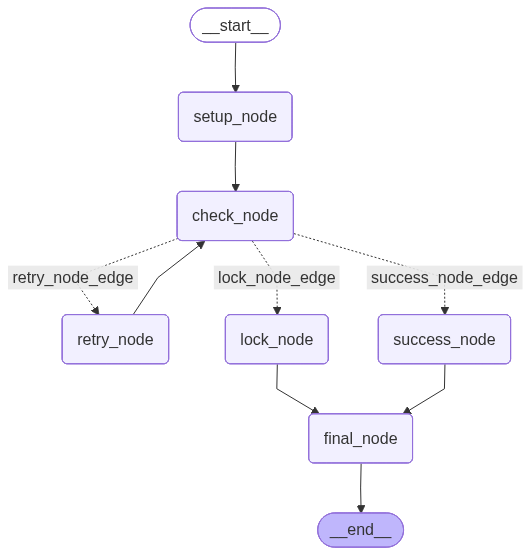

In [151]:
from IPython.display import Image,display
display(Image(system.get_graph().draw_mermaid_png()))